In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats


# Metoda najmniejszych kwadratów

In [ ]:
# Dane wejściowe: godziny nauki (x) i wyniki testu (y)
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Tworzenie macierzy projektującej X (dodajemy kolumnę jedynek)
X = np.vstack((x, np.ones(len(x)))).T

# Obliczanie współczynników metodą najmniejszych kwadratów
# beta = (X^T X)^(-1) X^T y
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Wyodrębnienie parametrów a (nachylenie) i b (wyraz wolny)
a, b = beta

print(f"Nachylenie (a): {a}")
print(f"Wyraz wolny (b): {b}")

# Rysowanie wykresu danych i dopasowanej linii regresji
plt.scatter(x, y, color='blue', label='Dane')
plt.plot(x, a * x + b, color='red', label='Linia regresji')
plt.xlabel('Godziny nauki')
plt.ylabel('Wynik z testu')
plt.legend()
plt.title('Metoda najmniejszych kwadratów - Regresja liniowa')
plt.show()

In [ ]:
# Obliczanie reszt (błędów) modelu
residuals = y - (a * x + b)

# Obliczanie wariancji reszt
residual_variance = np.var(residuals, ddof=2)

# Obliczanie macierzy kowariancji parametrów
XTX_inv = np.linalg.inv(X.T @ X)
param_covariance_matrix = residual_variance * XTX_inv

# Błędy standardowe parametrów a i b
param_errors = np.sqrt(np.diag(param_covariance_matrix))

error_a, error_b = param_errors

error_a, error_b

In [ ]:
# Obliczanie współczynnika korelacji Pearsona z macierzy projektującej X i wektora y
# Współczynnik korelacji Pearsona: r = cov(X, y) / (std(X) * std(y))

# Obliczanie średnich
mean_x = np.mean(x)
mean_y = np.mean(y)

# Obliczanie kowariancji
cov_xy = np.sum((x - mean_x) * (y - mean_y)) / (len(x) - 1)

# Obliczanie odchyleń standardowych
std_x = np.std(x, ddof=1)
std_y = np.std(y, ddof=1)

# Obliczanie współczynnika korelacji Pearsona
pearson_coefficient = cov_xy / (std_x * std_y)

pearson_coefficient

# Zadanie 1

Wykorzystując `np.random.normal`, wygeneruj dane testowe (1000 punktów na płaszczyźnie w zależnosci liniowej między x i y) , do których zastosuj metodę najmniejszych kwadratów (możesz użyć **stats.linregres, scipy.optimize.curve_fit, numpy.polyfit**).
- Znajdź parametry prostej $y = a \cdot x + b$ .


Wspolczynnik kierunkowy a: 2.479
Intercept (b): 5.358
Wspolczynnik determinacji R2: 0.960


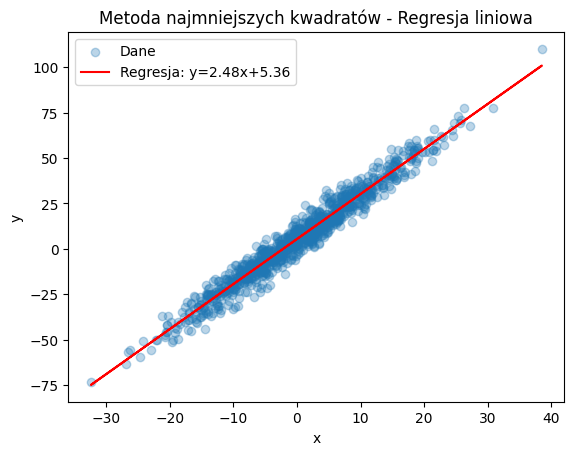

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(42)
N = 1000
a_true = 2.5
b_true = 5.0

x = np.random.normal(0, 10, N)

noise = np.random.normal(0, 5, N)
y = a_true * x + b_true + noise

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print(f"Wspolczynnik kierunkowy a: {slope:.3f}")
print(f"Intercept (b): {intercept:.3f}")
print(f"Wspolczynnik determinacji R2: {r_value**2:.3f}")

plt.scatter(x, y, alpha=0.3, label='Dane')
plt.plot(x, slope * x + intercept, color='red', label=f"Regresja: y={slope:.2f}x+{intercept:.2f}")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Metoda najmniejszych kwadratów - Regresja liniowa')
plt.show()

# Zadanie 2

Wczytaj dane z pliku **LungDisease.csv** do DataFrame za pomocą biblioteki `pandas`. Dane te zawierają informacje o liczbie lat, przez które pracownik był narażony na pył bawełniany (**Exposure**), oraz o miarze pojemności płuc (**PEFR** - szczytowy przepływ wydechowy).

- Następnie, używając biblioteki matplotlib lub seaborn, stwórz wykres punktowy, na którym na osi x znajdzie się zmienna **Exposure**, a na osi y zmienna **PEFR**.

- Po stworzeniu wykresu, oblicz współczynnik korelacji Pearsona między **Exposure** a **PEFR**, aby ilościowo określić siłę i kierunek zależności między tymi zmiennymi.

- Na koniec, dopasuj prostą regresji liniowej do danych, aby zobaczyć, jak **PEFR** zmienia się w zależności od **Exposure**. Wyświetl wykres z dopasowaną prostą regresji

- Zastanów się, czy na wykresie punktowym widać wyraźny trend lub wzorzec. Czy PEFR rośnie czy maleje wraz z Exposure? Czy są jakieś odstające punkty lub nietypowe dane?

   PEFR  Exposure
0   390         0
1   410         0
2   430         0
3   460         0
4   420         1

Współczynnik korelacji Pearsona: -0.277
p-wartość: 0.00201


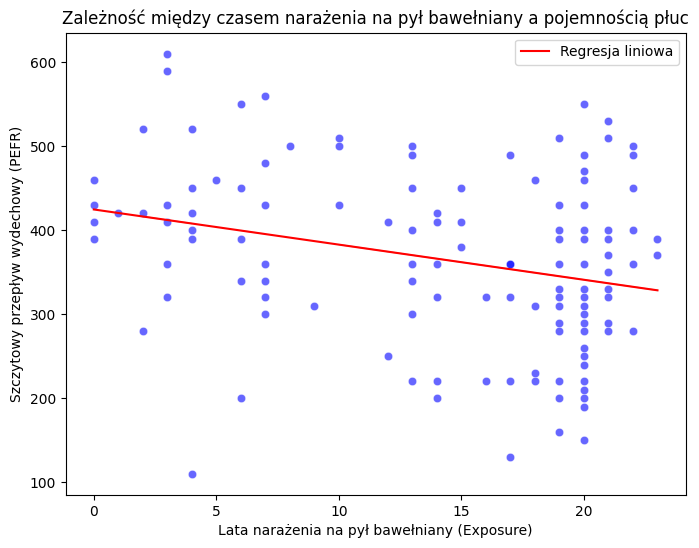


Parametry regresji liniowej:
Współczynnik kierunkowy a: -4.185
Wyraz wolny b: 424.583
Współczynnik determinacji R2: 0.077


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv("LungDisease.csv")

print(df.head())

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Exposure', y='PEFR', data=df, color='blue', alpha=0.6)
plt.title("Zależność między czasem narażenia na pył bawełniany a pojemnością płuc")
plt.xlabel("Lata narażenia na pył bawełniany (Exposure)")
plt.ylabel("Szczytowy przepływ wydechowy (PEFR)")

corr, p_value = stats.pearsonr(df['Exposure'], df['PEFR'])
print(f"\nWspółczynnik korelacji Pearsona: {corr:.3f}")
print(f"p-wartość: {p_value:.5f}")

slope, intercept, r_value, p_value, std_err = stats.linregress(df['Exposure'], df['PEFR'])

sns.lineplot(x=df['Exposure'], y=slope * df['Exposure'] + intercept, color='red', label='Regresja liniowa')
plt.legend()
plt.show()

print(f"\nParametry regresji liniowej:")
print(f"Współczynnik kierunkowy a: {slope:.3f}")
print(f"Wyraz wolny b: {intercept:.3f}")
print(f"Współczynnik determinacji R2: {r_value**2:.3f}")


# Zadanie 3

1. **Wczytaj dane:**
   - Wczytaj dane z pliku `anscombe.csv` do DataFrame za pomocą biblioteki `pandas`.
   - Przekształć dane, aby miały format:

     ```
         x1    y1    x2    y2    x3     y3   x4    y4
     0  10.0  8.04  10.0  9.14  10.0   7.46  8.0  6.58
     1   8.0  6.95   8.0  8.14   8.0   6.77  8.0  5.76
     ```

2. **Stwórz wykresy punktowe:**
   - Użyj biblioteki `matplotlib` lub `seaborn`, aby stworzyć wykresy.
   - Na każdej osi (`ax`) umieść wykres punktowy dla par `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4`.

3. **Dopasuj funkcje liniowe:**
   - Dla każdej pary `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4` dopasuj funkcję liniową w postaci $y = a \cdot x + b$.
   - Oblicz współczynniki `a` i `b` wraz z błędami dla każdej pary.

4. **Oblicz współczynnik korelacji:**
   - Oblicz współczynnik korelacji Pearsona dla każdej pary `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4`.



Wczytane dane:
     x1    y1    x2    y2    x3     y3   x4    y4
0  10.0  8.04  10.0  9.14  10.0   7.46  8.0  6.58
1   8.0  6.95   8.0  8.14   8.0   6.77  8.0  5.76
2  13.0  7.58  13.0  8.74  13.0  12.74  8.0  7.71
3   9.0  8.81   9.0  8.77   9.0   7.11  8.0  8.84
4  11.0  8.33  11.0  9.26  11.0   7.81  8.0  8.47

Dataset I:
  Parametry regresji liniowej:
    Współczynnik kierunkowy (a): 0.500
    Wyraz wolny (b): 3.000
  Współczynnik korelacji Pearsona: 0.816
  Współczynnik determinacji R2: 0.667

Dataset II:
  Parametry regresji liniowej:
    Współczynnik kierunkowy (a): 0.500
    Wyraz wolny (b): 3.001
  Współczynnik korelacji Pearsona: 0.816
  Współczynnik determinacji R2: 0.666

Dataset III:
  Parametry regresji liniowej:
    Współczynnik kierunkowy (a): 0.500
    Wyraz wolny (b): 3.002
  Współczynnik korelacji Pearsona: 0.816
  Współczynnik determinacji R2: 0.666

Dataset IV:
  Parametry regresji liniowej:
    Współczynnik kierunkowy (a): 0.500
    Wyraz wolny (b): 3.002
  Współc

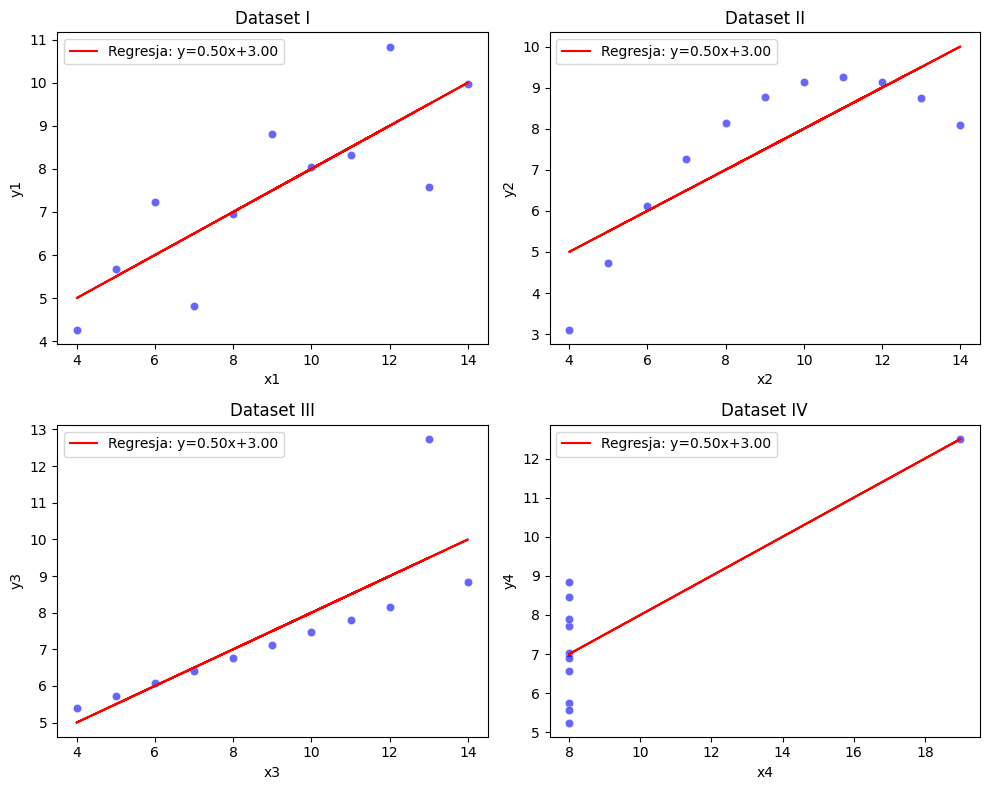

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

df = pd.read_csv("anscombe.csv", header=1)

df.columns = ['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4']

print("Wczytane dane:")
print(df.head())

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

data_sets = [('x1', 'y1'), ('x2', 'y2'), ('x3', 'y3'), ('x4', 'y4')]
titles = ['Dataset I', 'Dataset II', 'Dataset III', 'Dataset IV']

for i, (x_col, y_col) in enumerate(data_sets):
    x = df[x_col]
    y = df[y_col]

    sns.scatterplot(x=x, y=y, ax=axes[i], color='blue', alpha=0.6)
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(f'{x_col}')
    axes[i].set_ylabel(f'{y_col}')


    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    axes[i].plot(x, slope * x + intercept, color='red', label=f'Regresja: y={slope:.2f}x+{intercept:.2f}')
    axes[i].legend()

    corr, _ = stats.pearsonr(x, y)

    print(f"\n{titles[i]}:")
    print(f"  Parametry regresji liniowej:")
    print(f"    Współczynnik kierunkowy (a): {slope:.3f}")
    print(f"    Wyraz wolny (b): {intercept:.3f}")
    print(f"  Współczynnik korelacji Pearsona: {corr:.3f}")
    print(f"  Współczynnik determinacji R2: {r_value**2:.3f}")


plt.tight_layout()
plt.show()